In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

In [51]:
df = pd.read_csv('CleanedData.csv')

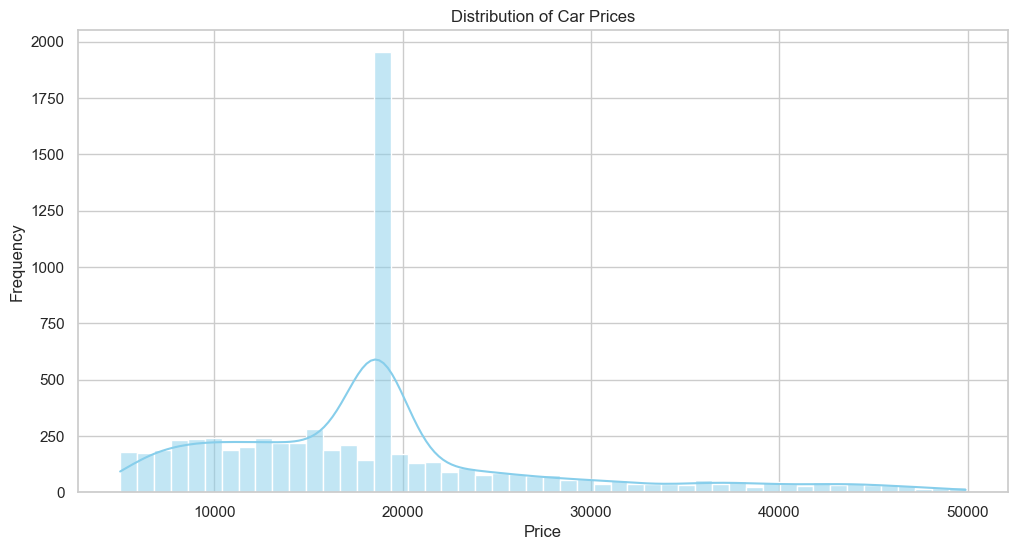

In [23]:
# Distribution of Car Prices
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

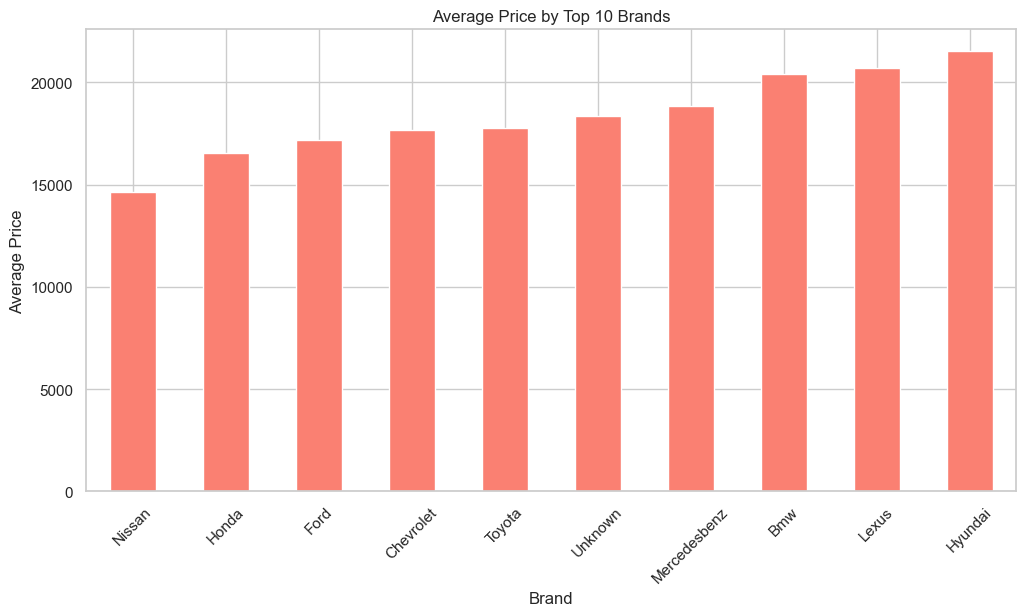

In [25]:
# Average Price by Brand (Top 10 Brands)
top_brands = df['Brand'].value_counts().head(10).index
avg_price_by_brand = df[df['Brand'].isin(top_brands)].groupby('Brand')['price'].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_price_by_brand.plot(kind='bar', color='salmon')
plt.title('Average Price by Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

C:\Users\CRIZMA MEGA STORE\AppData\Local\Temp\ipykernel_24204\2955760455.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fuel', palette='viridis', order=df['fuel'].value_counts().index)


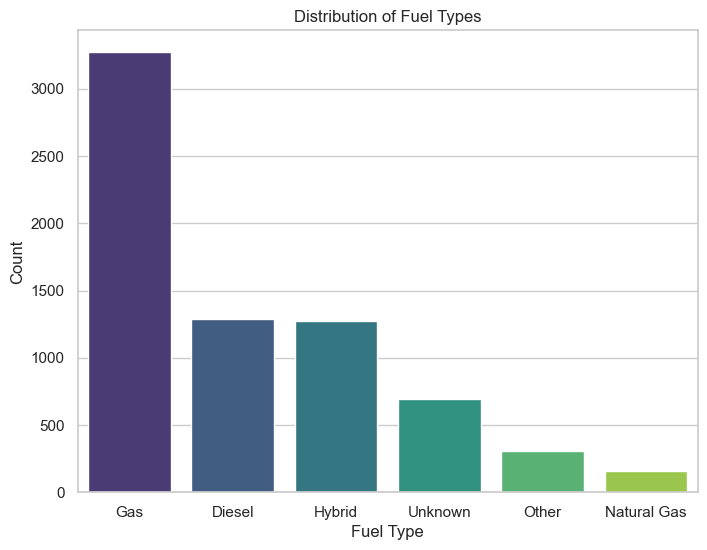

In [27]:
# Fuel Type Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='fuel', palette='viridis', order=df['fuel'].value_counts().index)
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

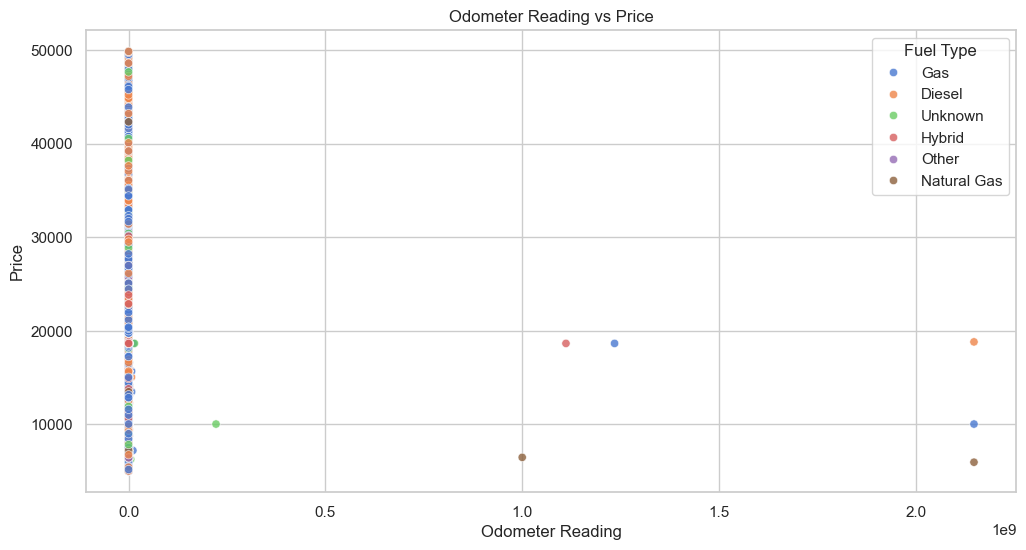

In [31]:
# Odometer vs Price (Scatter Plot)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Odometer', y='price', hue='fuel', alpha=0.8, palette='muted')
plt.title('Odometer Reading vs Price')
plt.xlabel('Odometer Reading')
plt.ylabel('Price')
plt.legend(title='Fuel Type')
plt.show()

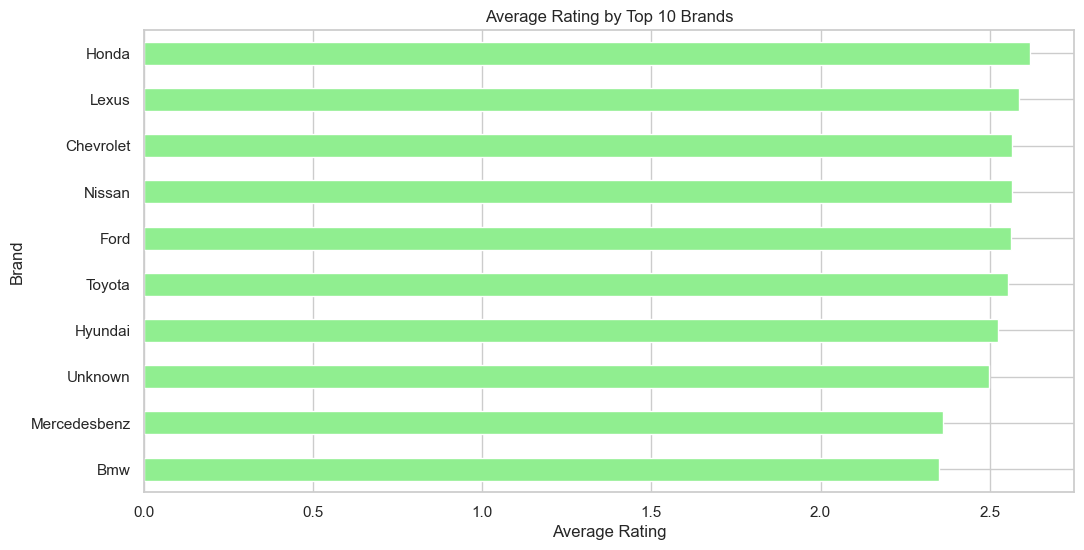

In [33]:
# Average Rating by Brand (Top 10 Brands)
avg_rating_by_brand = df[df['Brand'].isin(top_brands)].groupby('Brand')['rating'].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_rating_by_brand.plot(kind='barh', color='lightgreen')
plt.title('Average Rating by Top 10 Brands')
plt.xlabel('Average Rating')
plt.ylabel('Brand')
plt.show()

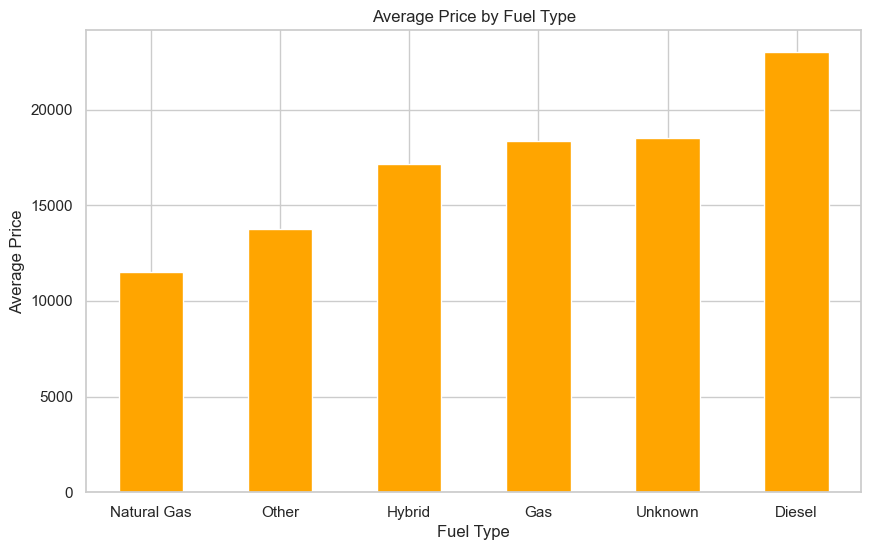

In [37]:
# Average Price by Fuel Type
avg_price_by_fuel = df.groupby('fuel')['price'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_price_by_fuel.plot(kind='bar', color='orange')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

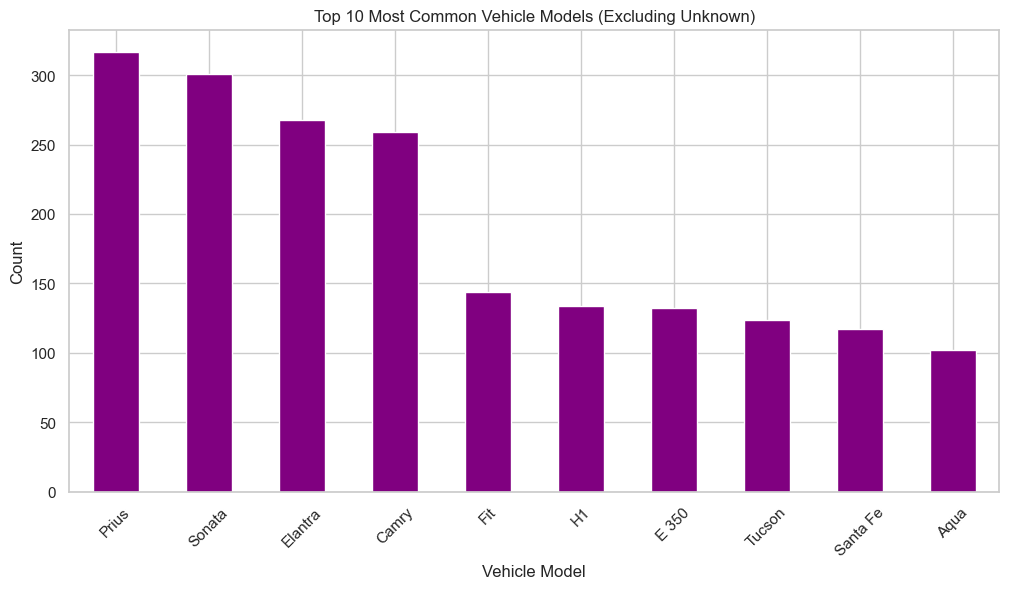

In [41]:
# Top 10 Most Common Vehicle Models
top_models = df[df['VehicleModel'] != 'Unknown']['VehicleModel'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_models.plot(kind='bar', color='purple')
plt.title('Top 10 Most Common Vehicle Models (Excluding Unknown)')
plt.xlabel('Vehicle Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

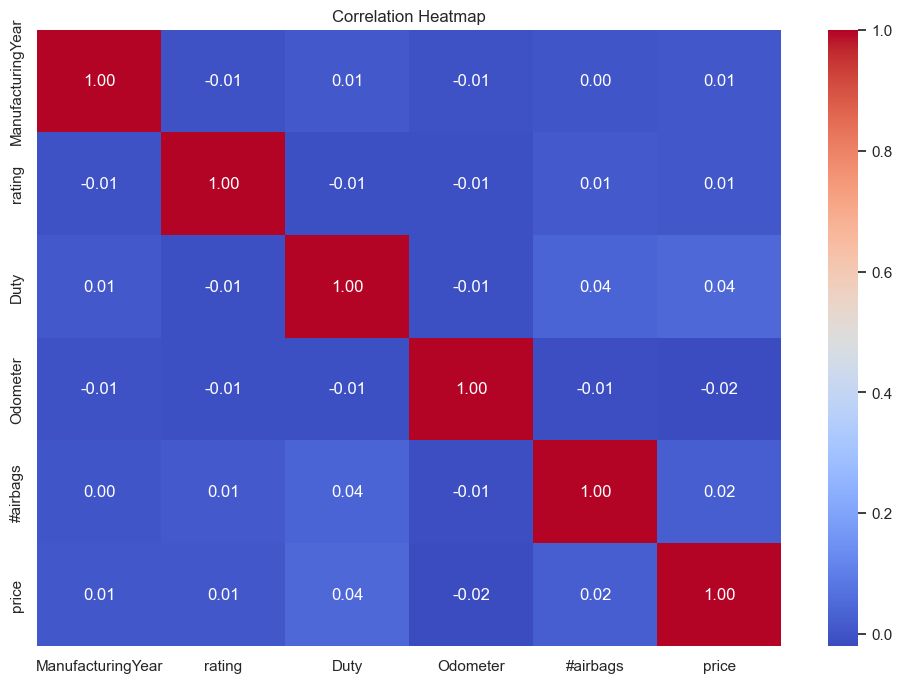

In [43]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[['ManufacturingYear', 'rating', 'Duty', 'Odometer', '#airbags', 'price']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\CRIZMA MEGA STORE\AppData\Local\Temp\ipykernel_24204\3633213317.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type of gear', y='price', palette='Set2')


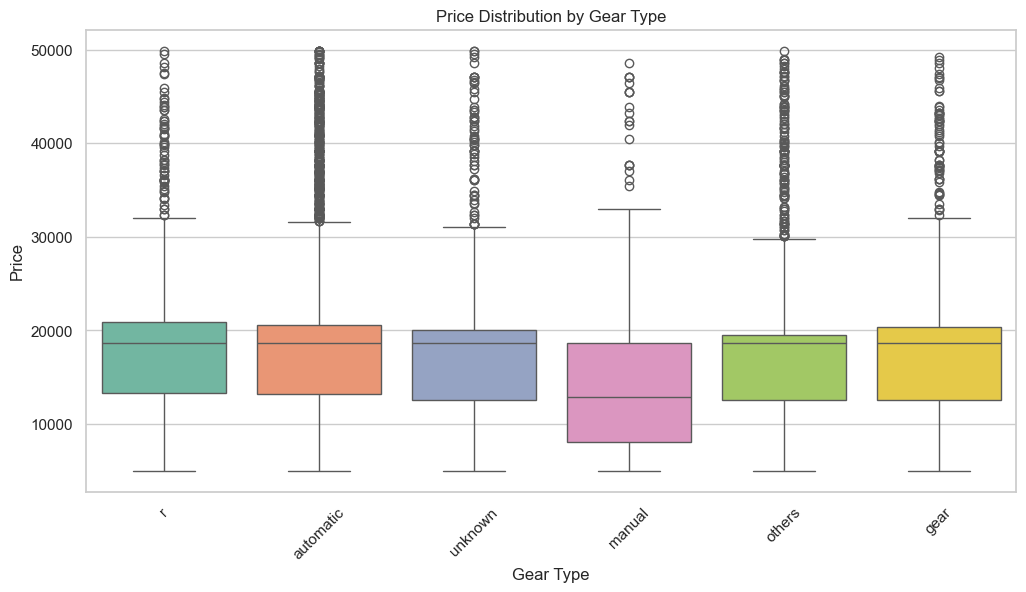

In [45]:
# Price Distribution by Gear Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='type of gear', y='price', palette='Set2')
plt.title('Price Distribution by Gear Type')
plt.xlabel('Gear Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

C:\Users\CRIZMA MEGA STORE\AppData\Local\Temp\ipykernel_24204\4097957502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CylinderCount', palette='magma')


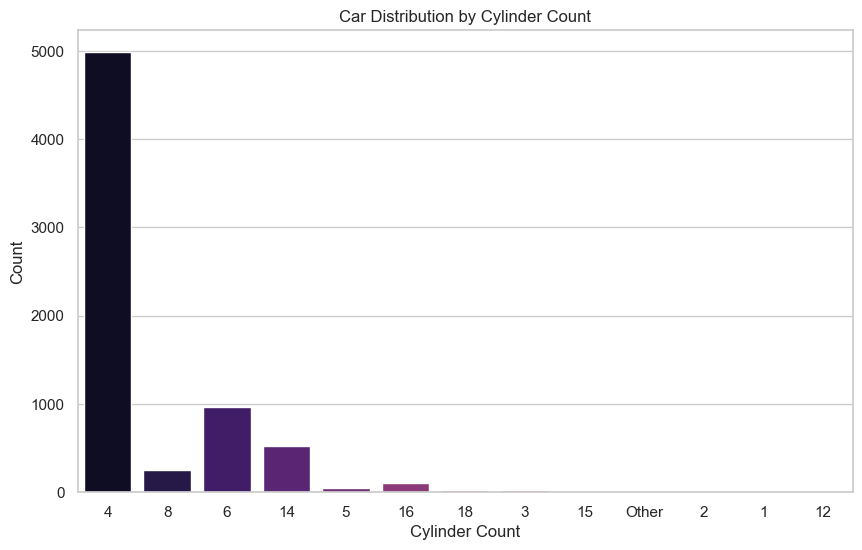

In [47]:
# Car Distribution by Cylinder Count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CylinderCount', palette='magma')
plt.title('Car Distribution by Cylinder Count')
plt.xlabel('Cylinder Count')
plt.ylabel('Count')
plt.show()

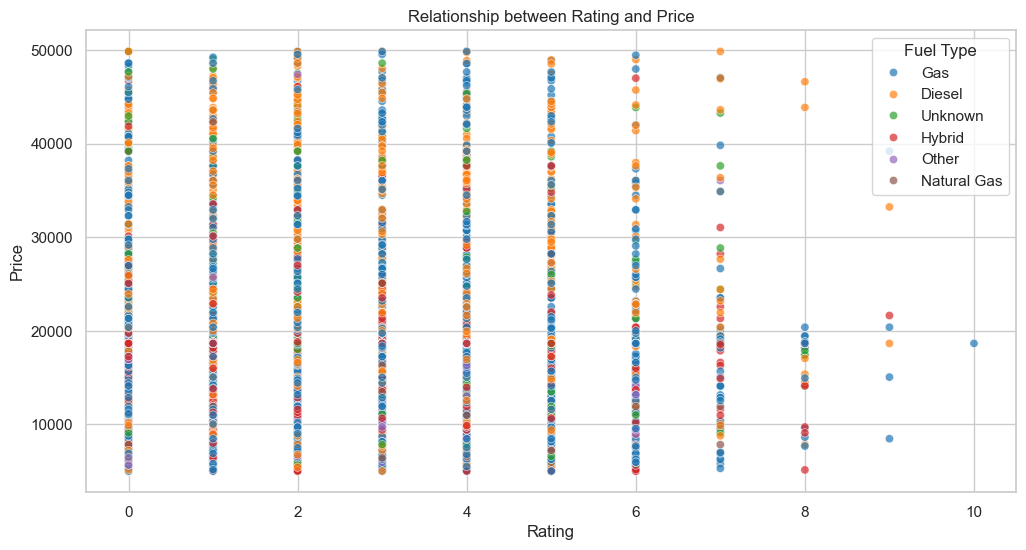

In [53]:
# Relationship between Rating and Price
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='rating', y='price', hue='fuel', palette='tab10', alpha=0.7)
plt.title('Relationship between Rating and Price')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.legend(title='Fuel Type')
plt.show()

# I started to search about more 'Visualization' here

<Figure size 1400x800 with 0 Axes>

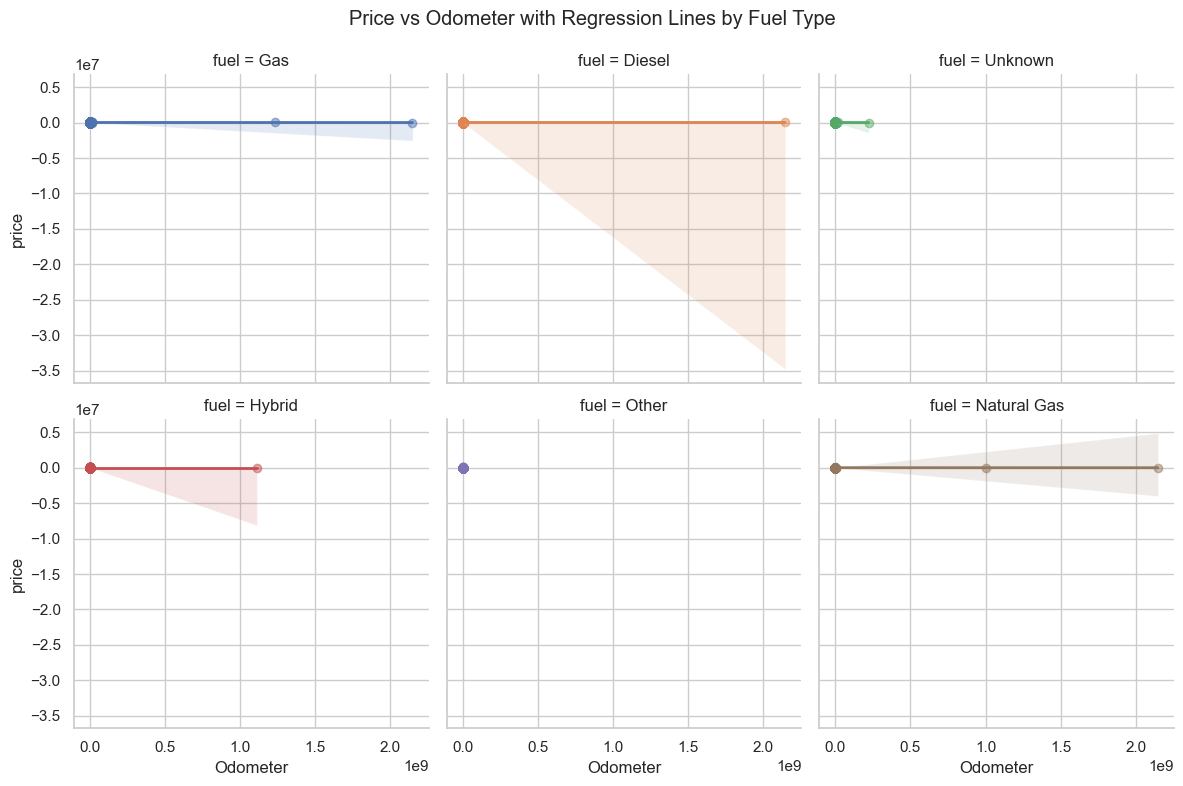

In [55]:
# Insight: This plot shows how odometer readings affect prices, segmented by fuel type
plt.figure(figsize=(14, 8))
sns.lmplot(
    data=df, 
    x='Odometer', 
    y='price', 
    hue='fuel', 
    col='fuel', 
    col_wrap=3, 
    height=4, 
    scatter_kws={'alpha': 0.5}, 
    line_kws={'linewidth': 2}
)
plt.subplots_adjust(top=0.9)
plt.suptitle('Price vs Odometer with Regression Lines by Fuel Type')
plt.show()

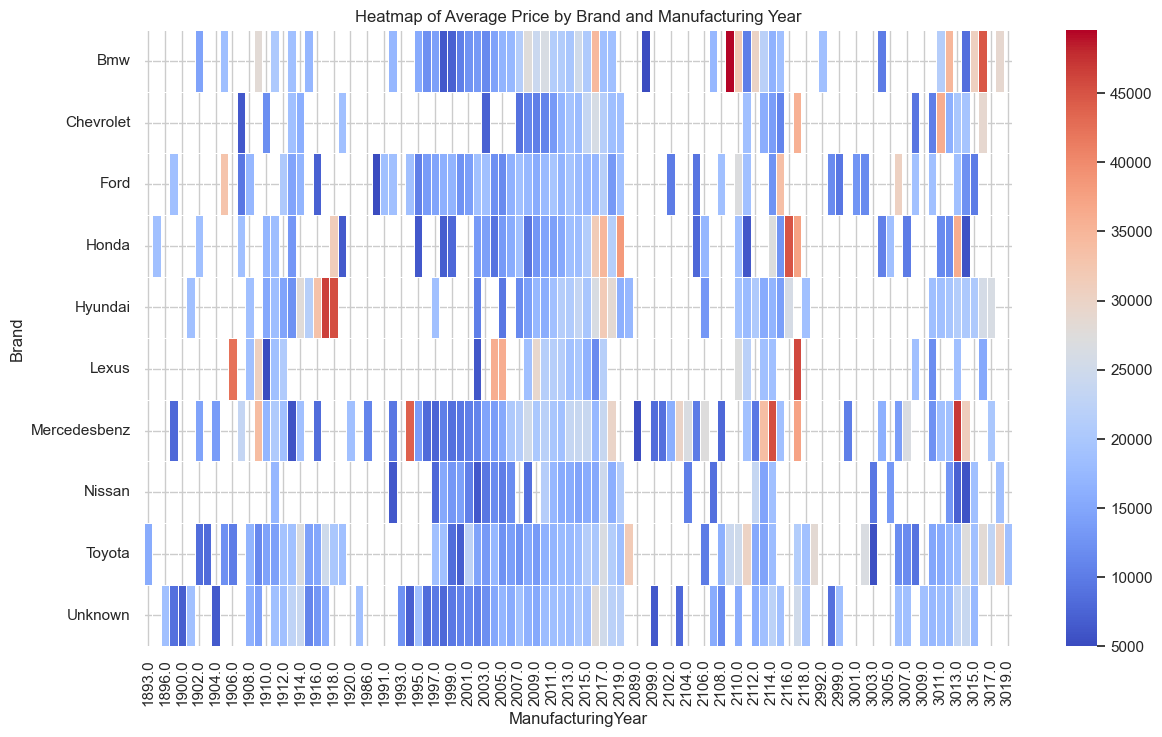

In [62]:
# Insight: Understand how car prices for top brands vary across different manufacturing years.
top_brands = df['Brand'].value_counts().head(10).index
filtered_df = df[df['Brand'].isin(top_brands)]

pivot_table = filtered_df.pivot_table(
    index='Brand', 
    columns='ManufacturingYear', 
    values='price', 
    aggfunc='mean'
)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Average Price by Brand and Manufacturing Year')
plt.show()

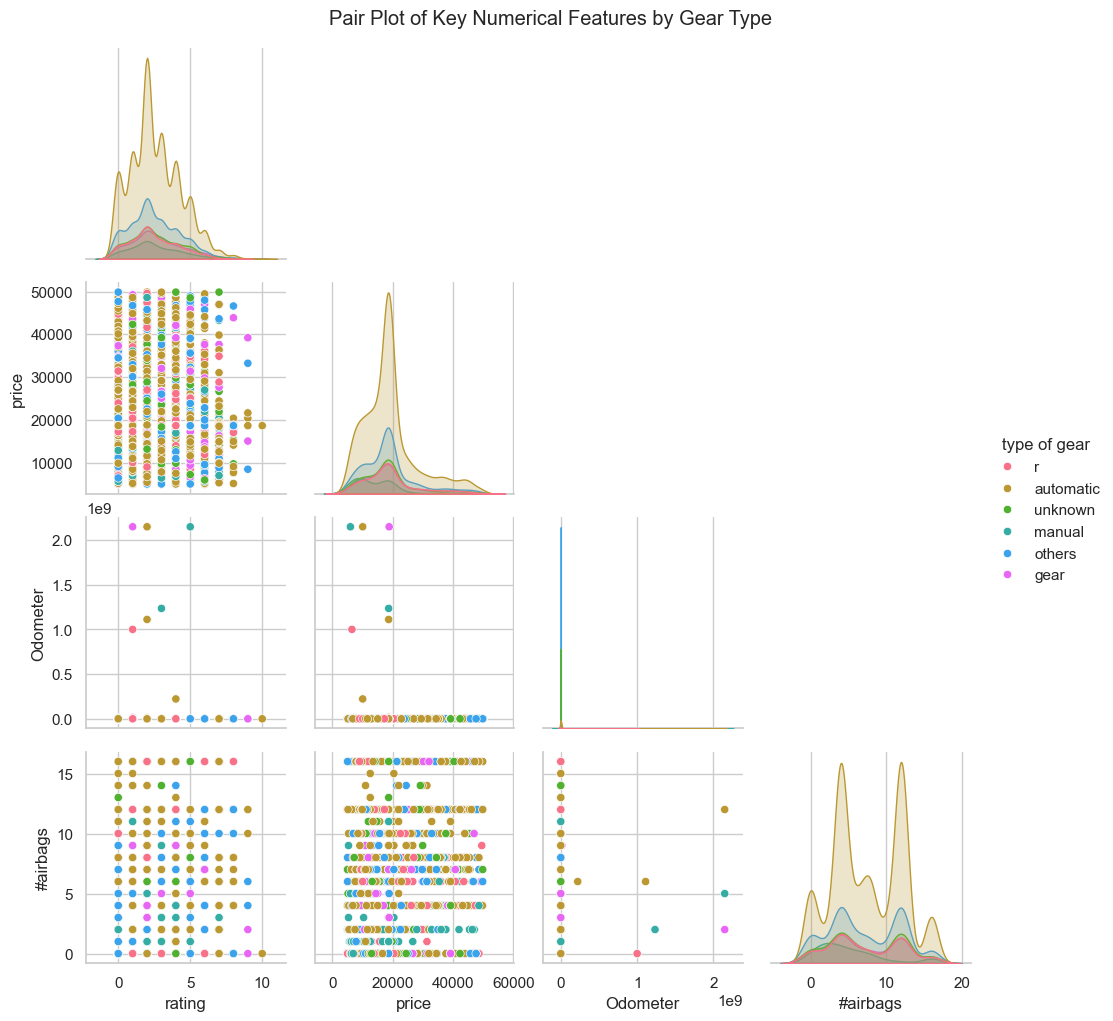

In [66]:
sns.pairplot(
    df[['rating', 'price', 'Odometer', '#airbags', 'type of gear']], 
    hue='type of gear', 
    palette='husl', 
    corner=True
)
plt.suptitle('Pair Plot of Key Numerical Features by Gear Type', y=1.02)
plt.show()